# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(ggrepel))
library(svglite)
library(RColorBrewer)




[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

In [2]:
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library(plyr))

In [3]:
#AvailableData()

# Read objects merged_unprocessed_db_filt_clustered_QCed

In [6]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [7]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered_QCed_reclustered.rds")

# Graphs of Cell Typist annotation

In [11]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/",'CellTypist_annotation_graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

## Graph WNN by SampleID

png 
  2

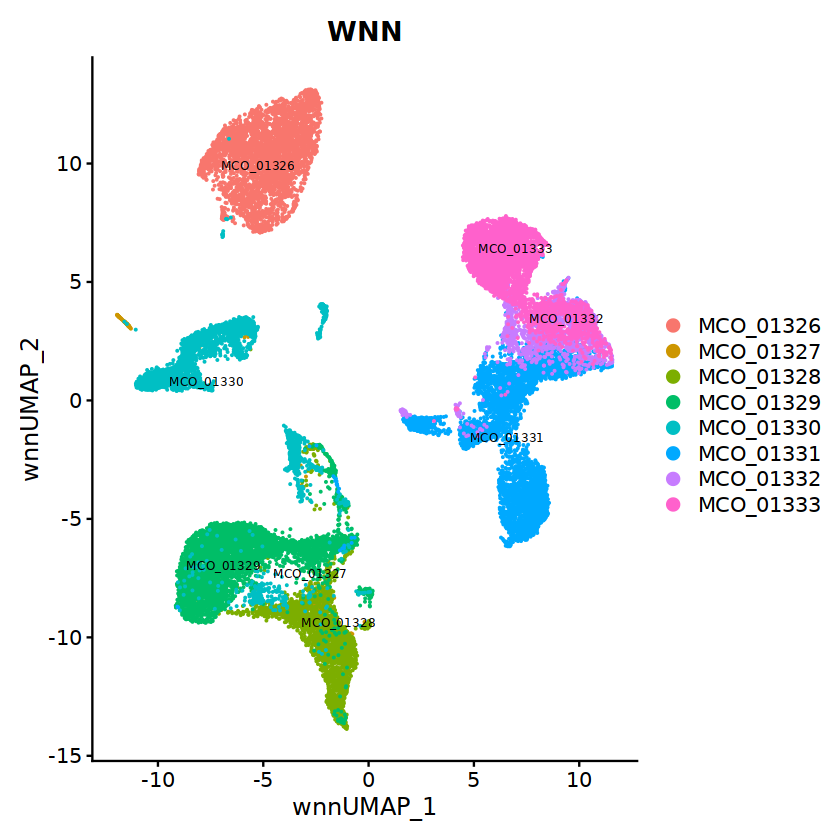

In [12]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

png 
  2

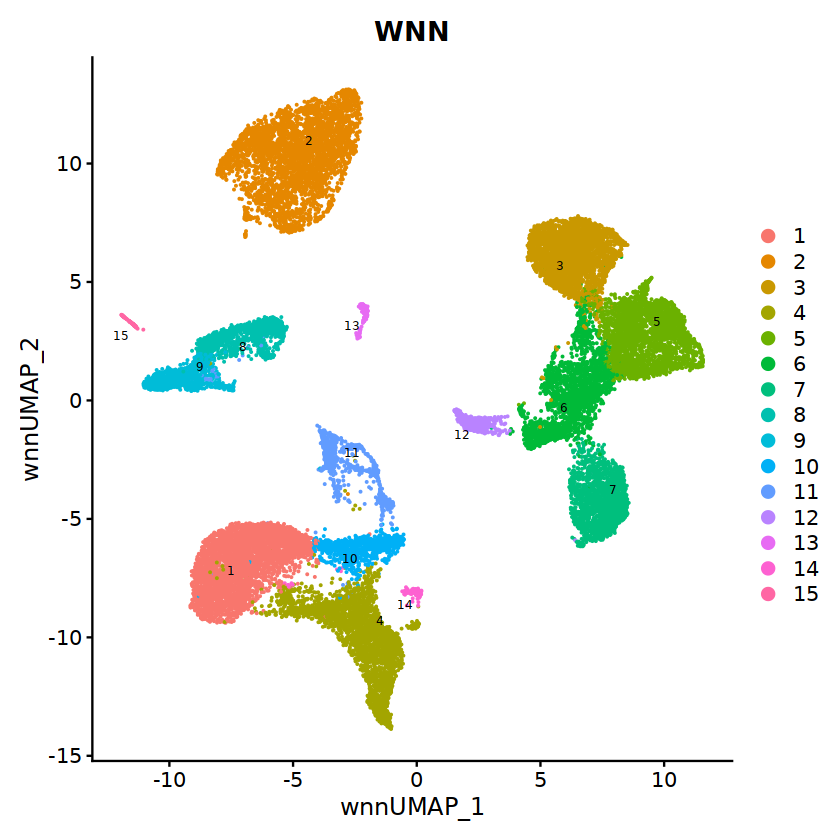

In [13]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

# Define marker genes

In [14]:
markers<-c('SOX2','SOX4','POU5F1',"KDR",'CDH5','CD34','GYPA','HBA2','HBZ','ITGA2B','GP1BA','GP1BB','TUBB1','CDKN2D','MAPK14','PTPRC','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA')

In [15]:
length(markers)

[1] 27

# Read Alsinet cell typist prediction

In [20]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [21]:
cell_typist<-read.csv(file="Alsinet_celltypist_prediction.csv")

In [22]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [23]:
str(row.names(cell_typist))

 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [24]:
colnames(cell_typist)

[1] "cell_barcode"                      "orig.ident"                       
 [3] "nCount_RNA"                        "nFeature_RNA"                     
 [5] "percent.mt"                        "nCount_RNA_raw"                   
 [7] "nFeature_RNA_raw"                  "nCount_ATAC"                      
 [9] "nFeature_ATAC"                     "gex_raw_reads"                    
[11] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[13] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[15] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[17] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[19] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[21] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[23] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[25] "gex_genes_count"                   "atac_raw_reads"                   
[27] "atac_unmapped_reads"               "atac_lowmapq"                     
[29] "atac_dup_reads"                    "atac_chimeric_reads"              
[31] "atac_mitochondrial_reads"          "atac_fragments"                   
[33] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[35] "atac_peak_region_cutsites"         "TSS.enrichment"                   
[37] "TSS.percentile"                    "scDblFinder.class"                
[39] "scDblFinder.score"                 "scDblFinder.weighted"             
[41] "scDblFinder.cxds_score"            "scDblFinder.class_atac"           
[43] "scDblFinder.score_atac"            "scDblFinder.weighted_atac"        
[45] "scDblFinder.cxds_score_atac"       "DBL_comb"                         
[47] "amulet_nFrags"                     "amulet_uniqFrags"                 
[49] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[51] "amulet_p.value"                    "amulet_q.value"                   
[53] "doublet_amulet"                    "Diff"                             
[55] "doublet"                           "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.2"                       
[61] "seurat_clusters"                   "wsnn_res.0.5"                     
[63] "n_counts"                          "predicted_labels"                 
[65] "conf_score"

In [25]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [26]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	26185 obs. of  2 variables:
 $ predicted_labels: chr  "iPSCs" "EarlyFibroblasts" "PrimitiveStreak" "iPSCs" ...
 $ conf_score      : num  0.95 0.136 0.992 0.062 0.449 ...
 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [27]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Alsinet'
)

In [28]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Alsinet'
)

## WNN by CellTypist_label_Alsinet

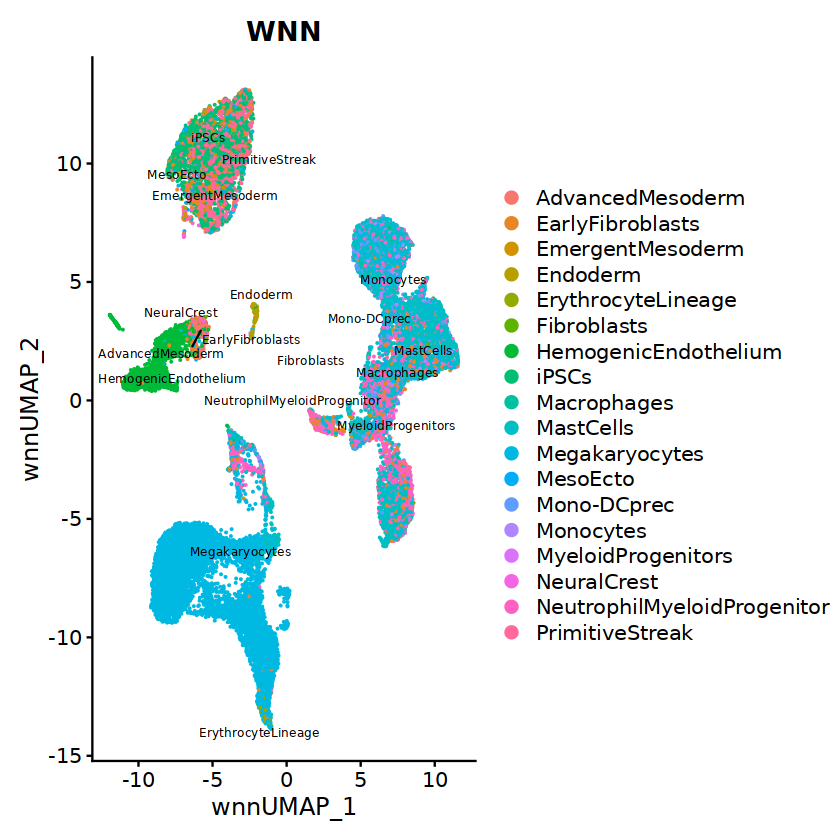

In [29]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "CellTypist_label_Alsinet", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3

In [30]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_CellTypist_label_Alsinet.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

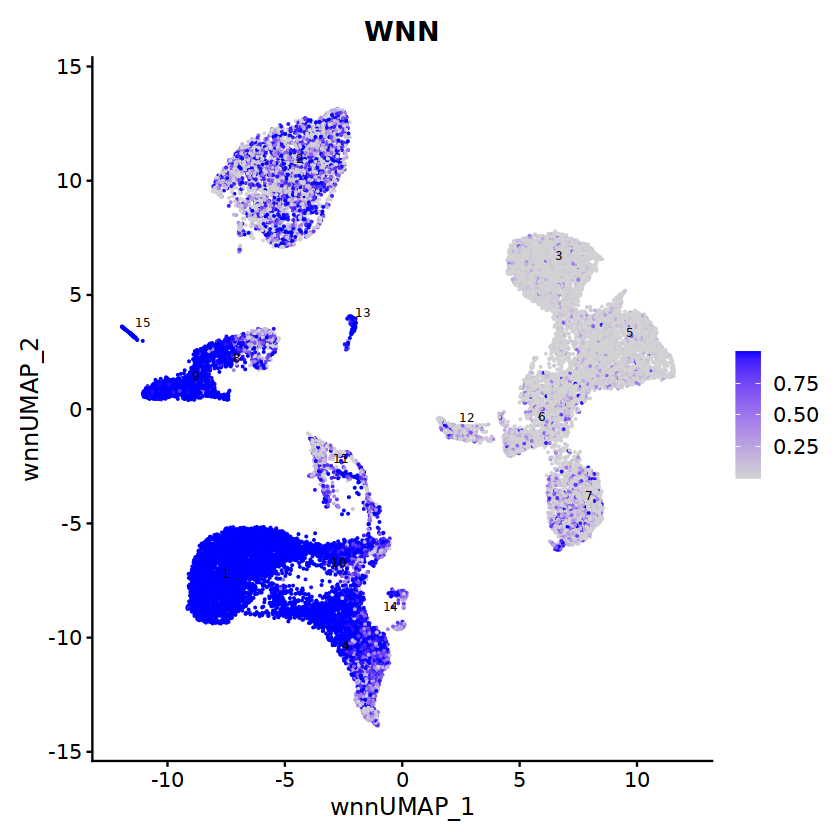

In [31]:
## Graph WNN by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.wnn", 
              features = "CellTypist_conf_score_Alsinet", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")

p3



In [32]:
setwd(path_graphs)
png(file='WNN_by_CellTypist_conf_score_Alsinet.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

png 
  2

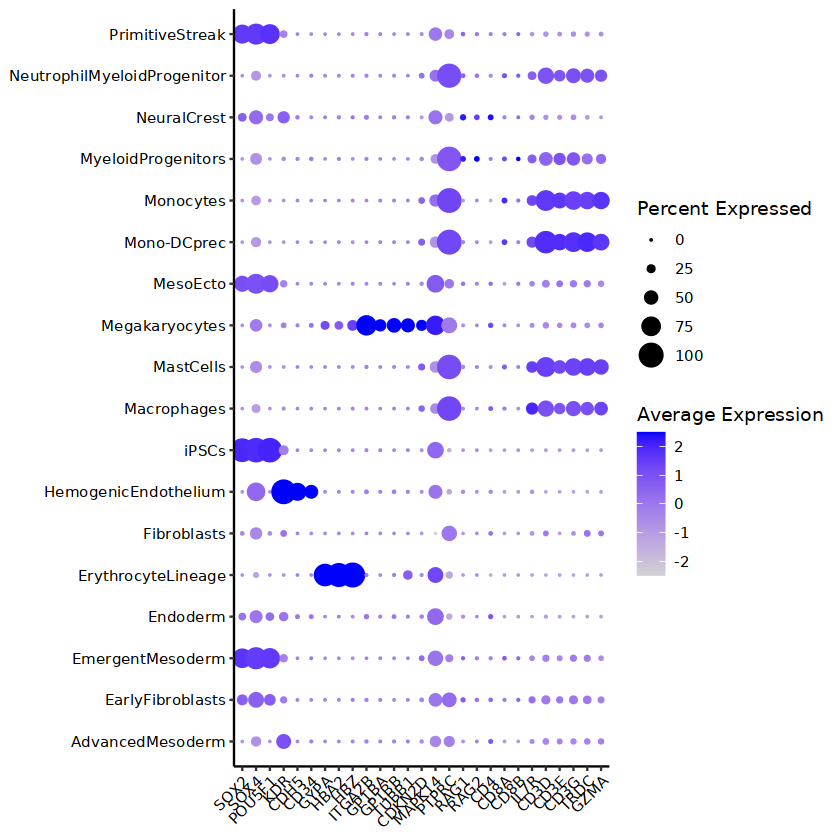

In [33]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="CellTypist_label_Alsinet")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_CellTypist_label_Alsinet.png', width =1000)
dotplot3
dev.off()

# Read FBMA cell typist prediction

In [34]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [35]:
cell_typist<-read.csv(file="FBMA_celltypist_prediction.csv")

In [36]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [37]:
str(row.names(cell_typist))

 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [38]:
colnames(cell_typist)

[1] "cell_barcode"                      "orig.ident"                       
 [3] "nCount_RNA"                        "nFeature_RNA"                     
 [5] "percent.mt"                        "nCount_RNA_raw"                   
 [7] "nFeature_RNA_raw"                  "nCount_ATAC"                      
 [9] "nFeature_ATAC"                     "gex_raw_reads"                    
[11] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[13] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[15] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[17] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[19] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[21] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[23] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[25] "gex_genes_count"                   "atac_raw_reads"                   
[27] "atac_unmapped_reads"               "atac_lowmapq"                     
[29] "atac_dup_reads"                    "atac_chimeric_reads"              
[31] "atac_mitochondrial_reads"          "atac_fragments"                   
[33] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[35] "atac_peak_region_cutsites"         "TSS.enrichment"                   
[37] "TSS.percentile"                    "scDblFinder.class"                
[39] "scDblFinder.score"                 "scDblFinder.weighted"             
[41] "scDblFinder.cxds_score"            "scDblFinder.class_atac"           
[43] "scDblFinder.score_atac"            "scDblFinder.weighted_atac"        
[45] "scDblFinder.cxds_score_atac"       "DBL_comb"                         
[47] "amulet_nFrags"                     "amulet_uniqFrags"                 
[49] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[51] "amulet_p.value"                    "amulet_q.value"                   
[53] "doublet_amulet"                    "Diff"                             
[55] "doublet"                           "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.2"                       
[61] "seurat_clusters"                   "wsnn_res.0.5"                     
[63] "n_counts"                          "predicted_labels"                 
[65] "conf_score"

In [39]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [40]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	26185 obs. of  2 variables:
 $ predicted_labels: chr  "DC3" "DC3" "myelocyte" "late erythroid" ...
 $ conf_score      : num  1 1 1 1 1 ...
 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [41]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_FBMA'
)

In [42]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_FBMA'
)

## WNN by CellTypist_label_FBMA

In [43]:
p3 <- DimPlot(
    object = adata, 
    reduction = "umap.wnn", 
    group.by = "CellTypist_label_FBMA", 
    label = TRUE, 
    label.size = 2.5
) + 
ggtitle("WNN UMAP Labeled by CellTypist") +
theme(plot.title = element_text(hjust = 0.5, face = "bold"))

# 2. Fix Color Warning and Apply Palette
# This resolves the "Not enough colours" warning by creating a large, distinct color set.
n_colors <- length(unique(adata$CellTypist_label_FBMA))

if (n_colors > 0) {
    # Use RColorBrewer and colorRampPalette to generate enough distinct colors
    color_palette <- colorRampPalette(brewer.pal(max(3, min(n_colors, 12)), "Set3"))(n_colors)
    p3 <- p3 + scale_color_manual(values = color_palette)
}

# 3. Apply Legend Modifications (NEW)

p3 <- p3 + 
    # Move the legend to the bottom
    theme(
        plot.title = element_text(hjust = 0.5, face = "bold"),
        legend.position = "bottom", 
        # Optional: Adjust legend text size for better fit
        legend.text = element_text(size = 8) 
    ) +
    # Control the number of rows in the legend to ensure 6 labels per line
    guides(color = guide_legend(nrow = ceiling(n_colors / 6), ncol = 6))

# 3. Save the Plot to File (The essential step to resolve the viewport error)

setwd(path_graphs)

ggsave(
    filename = "WNN_by_CellTypist_label_FBMA.png",
    plot = p3, 
    width = 10,  # Define a sufficient width
    height = 8,  # Define a sufficient height
    units = "in",
    dpi = 300    # High resolution
)
# --- Code End ---

## WNN by CellTypist_conf_score_FBMA

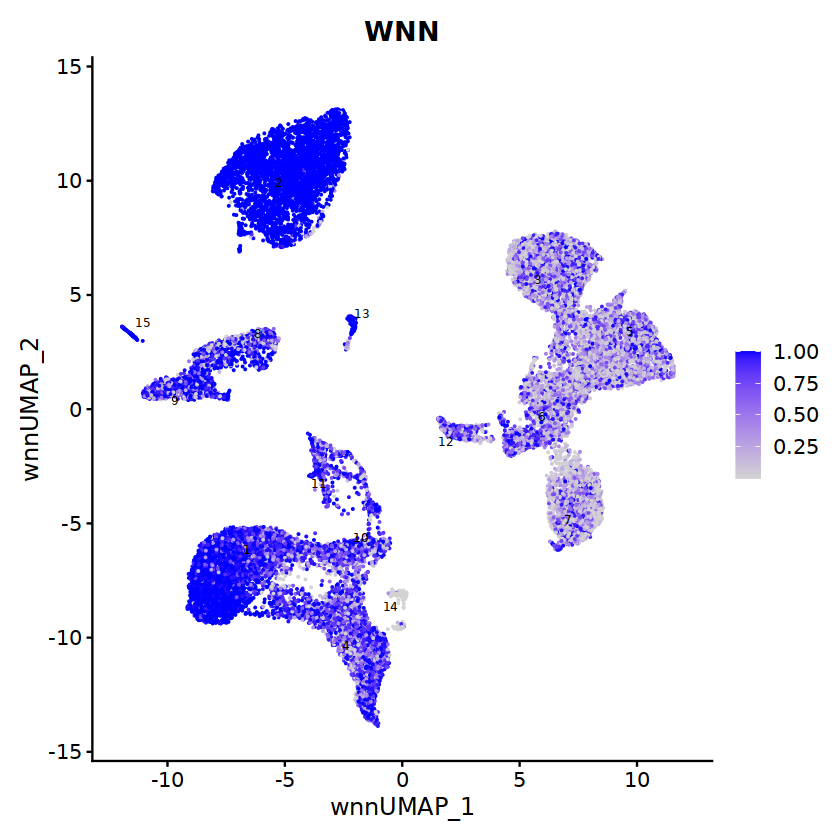

In [44]:
## Graph WNN by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.wnn", 
              features = "CellTypist_conf_score_FBMA", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")

p3



In [45]:
setwd(path_graphs)
png(file='WNN_by_CellTypist_conf_score_FBMA.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

png 
  2

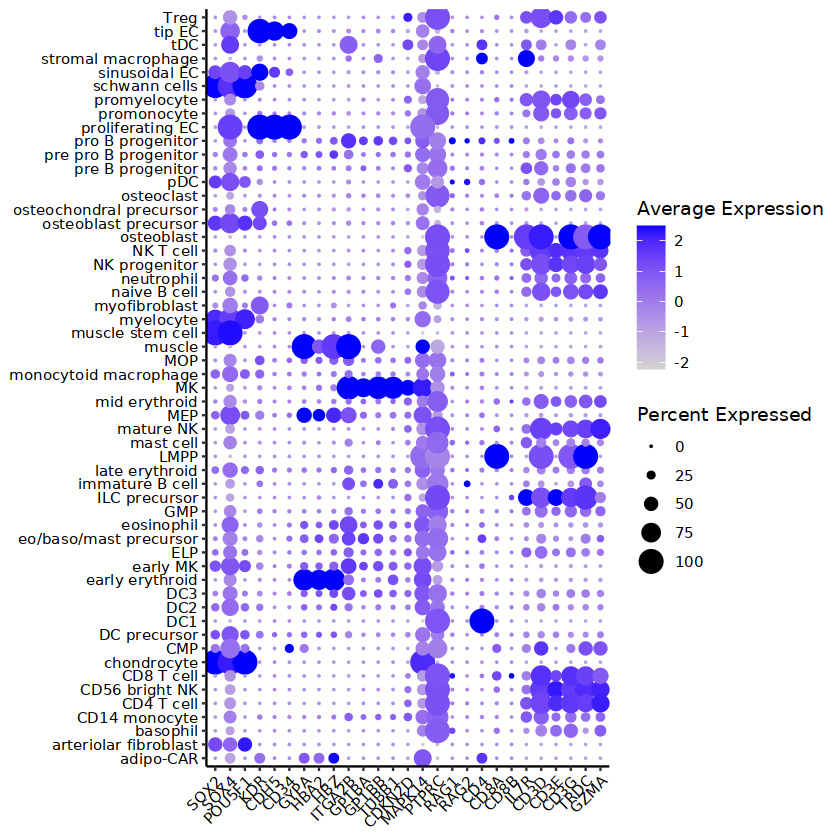

In [46]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="CellTypist_label_FBMA")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_CellTypist_FBMA.png', width =1000)
dotplot3
dev.off()

# Read Immune_ALL_low cell typist prediction

In [47]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [48]:
cell_typist<-read.csv(file="Immune_ALL_low_celltypist_prediction.csv")

In [49]:
#str(cell_typist)
str(row.names(cell_typist))
row.names(cell_typist)<-cell_typist$X


 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [50]:
str(row.names(cell_typist))

 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


In [51]:
colnames(cell_typist)

[1] "cell_barcode"                      "orig.ident"                       
 [3] "nCount_RNA"                        "nFeature_RNA"                     
 [5] "percent.mt"                        "nCount_RNA_raw"                   
 [7] "nFeature_RNA_raw"                  "nCount_ATAC"                      
 [9] "nFeature_ATAC"                     "gex_raw_reads"                    
[11] "gex_mapped_reads"                  "gex_conf_intergenic_reads"        
[13] "gex_conf_exonic_reads"             "gex_conf_intronic_reads"          
[15] "gex_conf_exonic_unique_reads"      "gex_conf_exonic_antisense_reads"  
[17] "gex_conf_exonic_dup_reads"         "gex_exonic_umis"                  
[19] "gex_conf_intronic_unique_reads"    "gex_conf_intronic_antisense_reads"
[21] "gex_conf_intronic_dup_reads"       "gex_intronic_umis"                
[23] "gex_conf_txomic_unique_reads"      "gex_umis_count"                   
[25] "gex_genes_count"                   "atac_raw_reads"                   
[27] "atac_unmapped_reads"               "atac_lowmapq"                     
[29] "atac_dup_reads"                    "atac_chimeric_reads"              
[31] "atac_mitochondrial_reads"          "atac_fragments"                   
[33] "atac_TSS_fragments"                "atac_peak_region_fragments"       
[35] "atac_peak_region_cutsites"         "TSS.enrichment"                   
[37] "TSS.percentile"                    "scDblFinder.class"                
[39] "scDblFinder.score"                 "scDblFinder.weighted"             
[41] "scDblFinder.cxds_score"            "scDblFinder.class_atac"           
[43] "scDblFinder.score_atac"            "scDblFinder.weighted_atac"        
[45] "scDblFinder.cxds_score_atac"       "DBL_comb"                         
[47] "amulet_nFrags"                     "amulet_uniqFrags"                 
[49] "amulet_nAbove2"                    "amulet_total.nAbove2"             
[51] "amulet_p.value"                    "amulet_q.value"                   
[53] "doublet_amulet"                    "Diff"                             
[55] "doublet"                           "nCount_SCT"                       
[57] "nFeature_SCT"                      "SCT.weight"                       
[59] "ATAC.weight"                       "wsnn_res.2"                       
[61] "seurat_clusters"                   "wsnn_res.0.5"                     
[63] "n_counts"                          "predicted_labels"                 
[65] "conf_score"

In [52]:
cell_typist_subset<-cell_typist[,c(which(colnames(cell_typist) %in% c("predicted_labels","conf_score")))]

In [53]:
str(cell_typist_subset)
str(row.names(cell_typist_subset))

'data.frame':	26185 obs. of  2 variables:
 $ predicted_labels: chr  "Epithelial cells" "Epithelial cells" "Epithelial cells" "Epithelial cells" ...
 $ conf_score      : num  1 1 1 1 1 ...
 chr [1:26185] "1" "2" "3" "4" "5" "6" "7" "8" "9" "10" "11" "12" "13" "14" ...


## Add the metadata to the Seurat object

In [54]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$predicted_labels,
  col.name = 'CellTypist_label_Immune_ALL_low'
)

In [55]:
adata <- AddMetaData(
  object = adata,
  metadata = cell_typist_subset$conf_score,
  col.name = 'CellTypist_conf_score_Immune_ALL_low'
)

## WNN by CellTypist_label_Immune_ALL_low

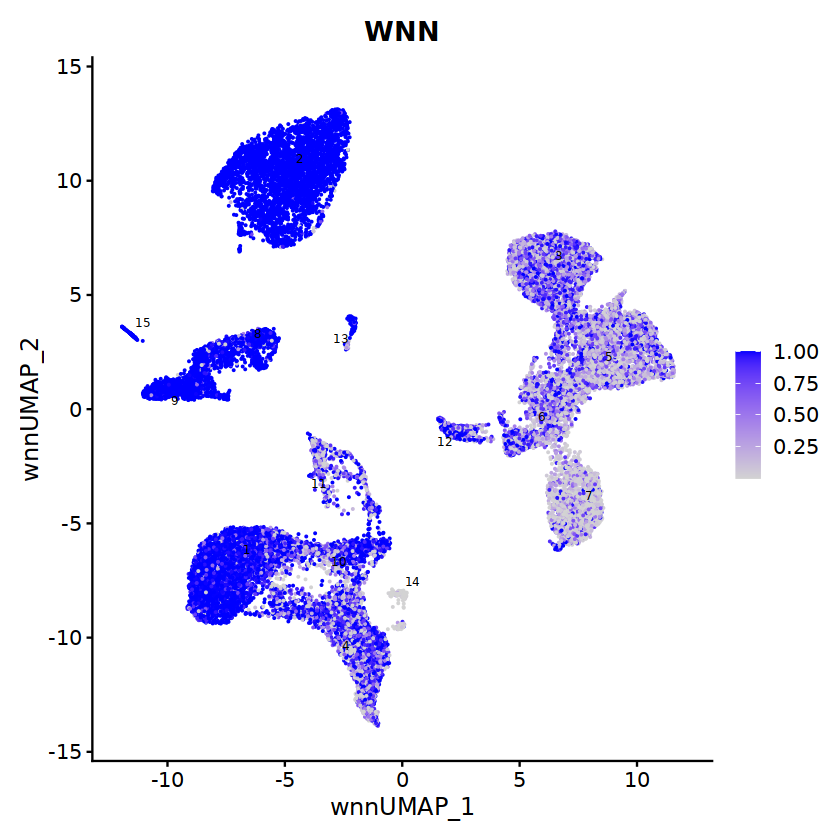

In [56]:
## Graph WNN by CellTypist_conf_score

p3 <- FeaturePlot(adata, reduction = "umap.wnn", 
              features = "CellTypist_conf_score_Immune_ALL_low", 
              label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")

p3



In [57]:
setwd(path_graphs)
png(file='WNN_by_CellTypist_conf_score_Immune_ALL_low.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

png 
  2

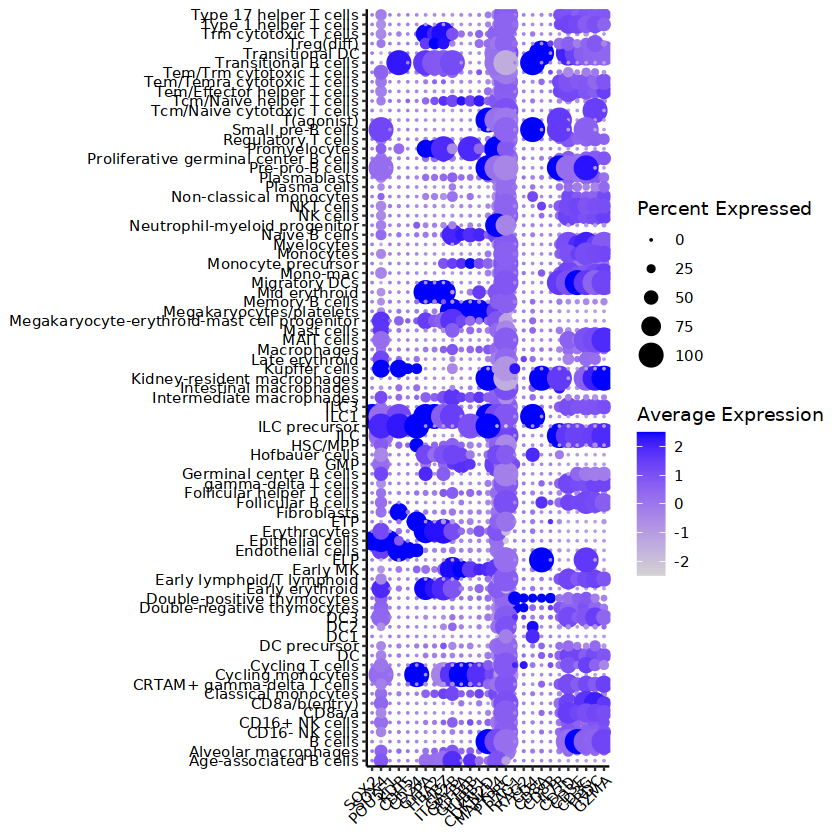

In [58]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="CellTypist_label_Immune_ALL_low")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_CellTypist_Immune_ALL_low.png', width =1000)
dotplot3
dev.off()

# Factor orig.ident

In [59]:
unique(adata@meta.data$orig.ident)

[1] "MCO_01326" "MCO_01327" "MCO_01328" "MCO_01329" "MCO_01330" "MCO_01331"
[7] "MCO_01332" "MCO_01333"

In [60]:
adata@meta.data$orig.ident<-factor(adata@meta.data$orig.ident,
                                                   levels=c('MCO_01326','MCO_01327','MCO_01328','MCO_01329','MCO_01330','MCO_01331','MCO_01332','MCO_01333'),
                                                   ordered=T)

# Barplots to see distribution in Seurat clusters

## CellTypist_label_Alsinet

In [61]:
adata@meta.data$CellTypist_label_Alsinet<-factor(adata@meta.data$CellTypist_label_Alsinet,
                                                   levels=c('iPSCs',
                                                            'PrimitiveStreak',
                                                            'NeuralCrest',
                                                            'Endoderm',
                                                            'EmergentMesoderm',
                                                            'MesoEcto',
                                                            'AdvancedMesoderm',
                                                            'HemogenicEndothelium',
                                                            'ErythrocyteLineage',
                                                            'Megakaryocytes',
                                                            'EarlyFibroblasts',
                                                            'Fibroblasts',
                                                            'MyeloidProgenitors',
                                                            'Monocytes',
                                                            'Mono-DCprec',
                                                            'Macrophages',
                                                            'MastCells',
                                                            'NeutrophilMyeloidProgenitor'),
                                                   ordered=T)


summary(adata@meta.data$CellTypist_label_Alsinet)

iPSCs             PrimitiveStreak 
                       1857                        1545 
                NeuralCrest                    Endoderm 
                        115                         154 
           EmergentMesoderm                    MesoEcto 
                        146                         150 
           AdvancedMesoderm        HemogenicEndothelium 
                        338                        1892 
         ErythrocyteLineage              Megakaryocytes 
                         44                        9473 
           EarlyFibroblasts                 Fibroblasts 
                       1236                          20 
         MyeloidProgenitors                   Monocytes 
                         53                         402 
                Mono-DCprec                 Macrophages 
                        450                         165 
                  MastCells NeutrophilMyeloidProgenitor 
                       5902                        2243

In [62]:
met<-adata[[]]

In [63]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"

In [64]:
met.dt<-data.table(met,key=c("seurat_clusters","CellTypist_label_Alsinet",'orig.ident'))

In [65]:
#str(met.dt)

In [66]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [67]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [68]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [69]:
str(Freq.table)

'data.frame':	250 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 1 10 10 10 10 10 10 ...
 $ orig.ident              : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 4 5 6 3 3 3 4 4 4 ...
 $ CellTypist_label_Alsinet: Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 10 10 10 10 8 10 17 10 11 17 ...
 $ Freq                    : int  29 3842 48 2 1 31 9 729 1 225 ...
 $ TOTAL                   : int  29 3842 48 2 41 41 41 955 955 955 ...
 $ Perc                    : num  100 100 100 100 2.44 ...


In [70]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    93.0   500.0   957.2  1300.0  3871.0 

In [71]:
met.dt<-data.table(met, key=c("CellTypist_label_Alsinet"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_CellTypist_label_Alsinet=.N),by=key(met.dt)], stringsAsFactors=F)



In [72]:
str(Freq.table_CT_annotation)

'data.frame':	18 obs. of  2 variables:
 $ CellTypist_label_Alsinet     : Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_CellTypist_label_Alsinet: int  1857 1545 115 154 146 150 338 1892 44 9473 ...


### Filter x axis by frequency

In [73]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 10),]


str(Freq.table_filtered)

'data.frame':	238 obs. of  6 variables:
 $ seurat_clusters         : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 10 10 10 10 10 10 11 ...
 $ orig.ident              : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 4 5 3 3 3 4 4 4 3 ...
 $ CellTypist_label_Alsinet: Ord.factor w/ 18 levels "iPSCs"<"PrimitiveStreak"<..: 10 10 10 8 10 17 10 11 17 1 ...
 $ Freq                    : int  29 3842 48 1 31 9 729 1 225 1 ...
 $ TOTAL                   : int  29 3842 48 41 41 41 955 955 955 76 ...
 $ Perc                    : num  100 100 100 2.44 75.61 ...


In [74]:
vector_colors_CellTypist_label_Alsinet<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


length(vector_colors_CellTypist_label_Alsinet)

[1] 22

In [75]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=CellTypist_label_Alsinet)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_CellTypist_label_Alsinet,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=5,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."
Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


In [76]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Alsinet_vs_cluster",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

# First iteration of integrated annotation

In [77]:
adata@meta.data$Integrated_annotation<-NA

## Decision #1 hESCs cluster 2

In [78]:
indx.hESCs<-which(adata@meta.data$seurat_clusters%in%c('2'))

str(indx.hESCs)

 int [1:3886] 1 2 3 4 5 6 7 8 9 10 ...


In [79]:
adata@meta.data$Integrated_annotation[indx.hESCs]<-'hESC'

## Decision #2 HemogenicEndothelium clusters 8, 9 and 15

In [80]:
indx.HemogenicEndothelium<-which(adata@meta.data$seurat_clusters%in%c('8','9','15'))

str(indx.HemogenicEndothelium)

 int [1:2404] 3873 3876 3877 3878 3884 3885 3886 3887 3888 3889 ...


In [81]:
adata@meta.data$Integrated_annotation[indx.HemogenicEndothelium]<-'HemogenicEndothelium'

## Decision #3 Endoderm cluster 13

In [82]:
indx.Endoderm<-which(adata@meta.data$seurat_clusters%in%c('13'))

str(indx.Endoderm)

 int [1:155] 12076 12087 12088 12097 12111 12112 12165 12178 12186 12188 ...


In [83]:
adata@meta.data$Integrated_annotation[indx.Endoderm]<-'Endoderm'

## Barplot CellTypist_label_FBMA on Construction_annotation

In [84]:
indx.solved<-!is.na(adata@meta.data$Integrated_annotation)

str(indx.solved)

sum(indx.solved)

 logi [1:26185] TRUE TRUE TRUE TRUE TRUE TRUE ...


[1] 6445

In [85]:
adata@meta.data$Construction_annotation<-NA

In [86]:
adata@meta.data$Construction_annotation[indx.solved]<-adata@meta.data$Integrated_annotation[indx.solved]

In [87]:
indx.new<-is.na(adata@meta.data$Construction_annotation)

str(indx.new)

sum(indx.new)

 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...


[1] 19740

In [88]:
adata@meta.data$Construction_annotation[indx.new]<-adata@meta.data$CellTypist_label_FBMA[indx.new]

In [89]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation)


summary(adata@meta.data$Construction_annotation)


levels(adata@meta.data$Construction_annotation)


length(levels(adata@meta.data$Construction_annotation))

adipo-CAR               basophil          CD14 monocyte 
                     1                      8                    215 
            CD4 T cell         CD56 bright NK             CD8 T cell 
                  1801                   2280                     22 
                   CMP           DC precursor                    DC1 
                     3                     29                      1 
                   DC2                    DC3        early erythroid 
                    53                   1959                    505 
              early MK                    ELP               Endoderm 
                   287                    223                    155 
eo/baso/mast precursor             eosinophil                    GMP 
                    16                    233                   1445 
  HemogenicEndothelium                   hESC          ILC precursor 
                  2404                   3886                     23 
       immature B cell         late erythroid                   LMPP 
                     6                   3191                      1 
             mast cell              mature NK                    MEP 
                   104                    155                    460 
         mid erythroid                     MK  monocytoid macrophage 
                    55                   3348                     83 
                   MOP                 muscle              myelocyte 
                    89                      2                    272 
          naive B cell             neutrophil          NK progenitor 
                   216                    240                    153 
             NK T cell             osteoblast   osteoblast precursor 
                   280                      1                     11 
            osteoclast                    pDC       pre B progenitor 
                   106                      8                     50 
  pre pro B progenitor       pro B progenitor            promonocyte 
                   995                     82                    611 
          promyelocyte          sinusoidal EC     stromal macrophage 
                    79                      3                      8 
                   tDC                 tip EC                   Treg 
                     3                     12                     12

[1] "adipo-CAR"              "basophil"               "CD14 monocyte"         
 [4] "CD4 T cell"             "CD56 bright NK"         "CD8 T cell"            
 [7] "CMP"                    "DC precursor"           "DC1"                   
[10] "DC2"                    "DC3"                    "early erythroid"       
[13] "early MK"               "ELP"                    "Endoderm"              
[16] "eo/baso/mast precursor" "eosinophil"             "GMP"                   
[19] "HemogenicEndothelium"   "hESC"                   "ILC precursor"         
[22] "immature B cell"        "late erythroid"         "LMPP"                  
[25] "mast cell"              "mature NK"              "MEP"                   
[28] "mid erythroid"          "MK"                     "monocytoid macrophage" 
[31] "MOP"                    "muscle"                 "myelocyte"             
[34] "naive B cell"           "neutrophil"             "NK progenitor"         
[37] "NK T cell"              "osteoblast"             "osteoblast precursor"  
[40] "osteoclast"             "pDC"                    "pre B progenitor"      
[43] "pre pro B progenitor"   "pro B progenitor"       "promonocyte"           
[46] "promyelocyte"           "sinusoidal EC"          "stromal macrophage"    
[49] "tDC"                    "tip EC"                 "Treg"

[1] 51

In [90]:
met<-adata[[]]

In [91]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"

In [92]:
met.dt<-data.table(met,key=c("seurat_clusters","Construction_annotation",'orig.ident'))

In [93]:
#str(met.dt)

In [94]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [95]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [96]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [97]:
str(Freq.table)

'data.frame':	547 obs. of  6 variables:
 $ seurat_clusters        : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 3 3 3 3 4 4 4 4 4 ...
 $ Construction_annotation: Factor w/ 51 levels "adipo-CAR","basophil",..: 23 43 29 13 12 3 8 10 11 27 ...
 $ Freq                   : int  2 2 23 1 1 23 2 4 307 19 ...
 $ TOTAL                  : int  29 29 29 29 29 3842 3842 3842 3842 3842 ...
 $ Perc                   : num  6.9 6.9 79.31 3.45 3.45 ...


In [98]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     116     802    1086    1823    3871 

In [99]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [100]:
str(Freq.table_CT_annotation)

'data.frame':	51 obs. of  2 variables:
 $ Construction_annotation     : Factor w/ 51 levels "adipo-CAR","basophil",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  1 8 215 1801 2280 22 3 29 1 53 ...


### Filter x axis by frequency

In [101]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 10),]


str(Freq.table_filtered)

'data.frame':	531 obs. of  6 variables:
 $ seurat_clusters        : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ orig.ident             : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 3 3 3 3 4 4 4 4 4 ...
 $ Construction_annotation: Factor w/ 51 levels "adipo-CAR","basophil",..: 23 43 29 13 12 3 8 10 11 27 ...
 $ Freq                   : int  2 2 23 1 1 23 2 4 307 19 ...
 $ TOTAL                  : int  29 29 29 29 29 3842 3842 3842 3842 3842 ...
 $ Perc                   : num  6.9 6.9 79.31 3.45 3.45 ...


In [102]:
vector_colors_Construction_annotation<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


N_NEEDED<-length(levels(Freq.table_filtered$Construction_annotation))

base_colors <- RColorBrewer::brewer.pal(12, "Set3") 
custom_palette <- colorRampPalette(base_colors)(N_NEEDED)

In [103]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [104]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Construction_annotation_vs_cluster_after_Decisions_1_to_3",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

In [105]:
#Freq.table_filtered[which(Freq.table_filtered$seurat_clusters == '1'),]

## Decision #4 MK cluster 1

In [106]:
indx.MK<-which(adata@meta.data$seurat_clusters%in%c('1'))

str(indx.MK)

 int [1:3921] 4244 4249 4431 4433 4527 4540 4911 4981 5028 5077 ...


In [107]:
adata@meta.data$Integrated_annotation[indx.MK]<-'MK'

In [108]:
summary(as.factor(adata@meta.data$Integrated_annotation))

Endoderm HemogenicEndothelium                 hESC 
                 155                 2404                 3886 
                  MK                 NA's 
                3921                15819

## Barplot CellTypist_label_Immune_ALL_low on Construction_annotation

In [109]:
indx.solved<-!is.na(adata@meta.data$Integrated_annotation)

str(indx.solved)

sum(indx.solved)

 logi [1:26185] TRUE TRUE TRUE TRUE TRUE TRUE ...


[1] 10366

In [110]:
adata@meta.data$Construction_annotation<-NA

In [111]:
adata@meta.data$Construction_annotation[indx.solved]<-adata@meta.data$Integrated_annotation[indx.solved]

In [112]:
indx.new<-is.na(adata@meta.data$Construction_annotation)

str(indx.new)

sum(indx.new)

 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...


[1] 15819

In [113]:
adata@meta.data$Construction_annotation[indx.new]<-adata@meta.data$CellTypist_label_Immune_ALL_low[indx.new]

In [114]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation)


summary(adata@meta.data$Construction_annotation)


levels(adata@meta.data$Construction_annotation)


length(levels(adata@meta.data$Construction_annotation))

Age-associated B cells 
                                           4 
                        Alveolar macrophages 
                                         193 
                                     B cells 
                                           1 
                              CD16- NK cells 
                                        2904 
                              CD16+ NK cells 
                                         124 
                                      CD8a/a 
                                          51 
                               CD8a/b(entry) 
                                           8 
                         Classical monocytes 
                                         554 
                  CRTAM+ gamma-delta T cells 
                                          18 
                             Cycling T cells 
                                          10 
                                          DC 
                                          74 
                                DC precursor 
                                          14 
                                         DC1 
                                           2 
                                         DC2 
                                          13 
                                         DC3 
                                          16 
                  Double-negative thymocytes 
                                         596 
                  Double-positive thymocytes 
                                          83 
                             Early erythroid 
                                         540 
                   Early lymphoid/T lymphoid 
                                         116 
                                    Early MK 
                                          11 
                                         ELP 
                                           1 
                                    Endoderm 
                                         155 
                           Endothelial cells 
                                         272 
                            Epithelial cells 
                                         494 
                                Erythrocytes 
                                         389 
                                         ETP 
                                          13 
                                 Fibroblasts 
                                          56 
                          Follicular B cells 
                                          10 
                   Follicular helper T cells 
                                          58 
                         gamma-delta T cells 
                                         415 
                     Germinal center B cells 
                                           2 
                                         GMP 
                                           2 
                        HemogenicEndothelium 
                                        2404 
                                        hESC 
                                        3886 
                              Hofbauer cells 
                                           4 
                                     HSC/MPP 
                                          12 
                                         ILC 
                                           1 
                                        ILC1 
                                           1 
                                        ILC3 
                                        3410 
                    Intermediate macrophages 
                                          65 
                      Intestinal macrophages 
                                          17 
                 Kidney-resident macrophages 
                                           1 
                               Kupffer cells 
                                           1 
                              Late erythroid 
                    

[1] "Age-associated B cells"                      
 [2] "Alveolar macrophages"                        
 [3] "B cells"                                     
 [4] "CD16- NK cells"                              
 [5] "CD16+ NK cells"                              
 [6] "CD8a/a"                                      
 [7] "CD8a/b(entry)"                               
 [8] "Classical monocytes"                         
 [9] "CRTAM+ gamma-delta T cells"                  
[10] "Cycling T cells"                             
[11] "DC"                                          
[12] "DC precursor"                                
[13] "DC1"                                         
[14] "DC2"                                         
[15] "DC3"                                         
[16] "Double-negative thymocytes"                  
[17] "Double-positive thymocytes"                  
[18] "Early erythroid"                             
[19] "Early lymphoid/T lymphoid"                   
[20] "Early MK"                                    
[21] "ELP"                                         
[22] "Endoderm"                                    
[23] "Endothelial cells"                           
[24] "Epithelial cells"                            
[25] "Erythrocytes"                                
[26] "ETP"                                         
[27] "Fibroblasts"                                 
[28] "Follicular B cells"                          
[29] "Follicular helper T cells"                   
[30] "gamma-delta T cells"                         
[31] "Germinal center B cells"                     
[32] "GMP"                                         
[33] "HemogenicEndothelium"                        
[34] "hESC"                                        
[35] "Hofbauer cells"                              
[36] "HSC/MPP"                                     
[37] "ILC"                                         
[38] "ILC1"                                        
[39] "ILC3"                                        
[40] "Intermediate macrophages"                    
[41] "Intestinal macrophages"                      
[42] "Kidney-resident macrophages"                 
[43] "Kupffer cells"                               
[44] "Late erythroid"                              
[45] "Macrophages"                                 
[46] "MAIT cells"                                  
[47] "Mast cells"                                  
[48] "Megakaryocyte-erythroid-mast cell progenitor"
[49] "Megakaryocytes/platelets"                    
[50] "Memory B cells"                              
[51] "Mid erythroid"                               
[52] "Migratory DCs"                               
[53] "MK"                                          
[54] "Mono-mac"                                    
[55] "Monocyte precursor"                          
[56] "Monocytes"                                   
[57] "Myelocytes"                                  
[58] "Naive B cells"                               
[59] "Neutrophil-myeloid progenitor"               
[60] "NK cells"                                    
[61] "NKT cells"                                   
[62] "Non-classical monocytes"                     
[63] "Plasma cells"                                
[64] "Plasmablasts"                                
[65] "Pre-pro-B cells"                             
[66] "Proliferative germinal center B cells"       
[67] "Promyelocytes"                               
[68] "Regulatory T cells"                          
[69] "Small pre-B cells"                           
[70] "T(agonist)"                                  
[71] "Tcm/Naive cytotoxic T cells"                 
[72] "Tcm/Naive helper T cells"                    
[73] "Tem/Effector helper T cells"                 
[74] "Tem/Temra cytotoxic T cells"                 
[75] "Tem/Trm cytotoxic T cells"                   
[76] "Transitional B cells"                        
[77] "Transitional DC"                           

[1] 81

In [115]:
met<-adata[[]]

In [116]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"

In [117]:
met.dt<-data.table(met,key=c("seurat_clusters","Construction_annotation",'orig.ident'))

In [118]:
#str(met.dt)

In [119]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [120]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [121]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [122]:
str(Freq.table)

'data.frame':	546 obs. of  6 variables:
 $ seurat_clusters        : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 1 10 10 10 10 10 10 ...
 $ orig.ident             : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 4 5 6 3 3 3 3 3 3 ...
 $ Construction_annotation: Factor w/ 81 levels "Age-associated B cells",..: 53 53 53 53 4 8 47 25 48 24 ...
 $ Freq                   : int  29 3842 48 2 1 4 31 1 2 2 ...
 $ TOTAL                  : int  29 3842 48 2 41 41 41 41 41 41 ...
 $ Perc                   : num  100 100 100 100 2.44 ...


In [123]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1     135     802    1073    1823    3871 

In [124]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [125]:
str(Freq.table_CT_annotation)

'data.frame':	81 obs. of  2 variables:
 $ Construction_annotation     : Factor w/ 81 levels "Age-associated B cells",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  4 193 1 2904 124 51 8 554 18 10 ...


### Filter x axis by frequency

In [126]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 10),]


str(Freq.table_filtered)

'data.frame':	531 obs. of  6 variables:
 $ seurat_clusters        : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 10 10 10 10 10 10 10 ...
 $ orig.ident             : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 4 5 3 3 3 3 3 3 4 ...
 $ Construction_annotation: Factor w/ 81 levels "Age-associated B cells",..: 53 53 53 4 8 47 25 48 24 1 ...
 $ Freq                   : int  29 3842 48 1 4 31 1 2 2 1 ...
 $ TOTAL                  : int  29 3842 48 41 41 41 41 41 41 955 ...
 $ Perc                   : num  100 100 100 2.44 9.76 ...


In [127]:
vector_colors_Construction_annotation<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


N_NEEDED<-length(levels(Freq.table_filtered$Construction_annotation))

base_colors <- RColorBrewer::brewer.pal(12, "Set3") 
custom_palette <- colorRampPalette(base_colors)(N_NEEDED)

In [128]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [129]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Construction_annotation_vs_cluster_after_Decisions_4",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

In [130]:
#Freq.table_filtered[which(Freq.table_filtered$seurat_clusters == '12'),]

## Decision #5 Double-negative thymocytes cluster 12

In [131]:
indx.DN_tim<-which(adata@meta.data$seurat_clusters%in%c('12'))

str(indx.DN_tim)

 int [1:428] 15294 15321 15330 15332 15336 15344 15365 15413 15419 15434 ...


In [132]:
adata@meta.data$Integrated_annotation[indx.DN_tim]<-'Double-negative thymocytes'

In [133]:
summary(as.factor(adata@meta.data$Integrated_annotation))

Double-negative thymocytes                   Endoderm 
                       428                        155 
      HemogenicEndothelium                       hESC 
                      2404                       3886 
                        MK                       NA's 
                      3921                      15391

# Final decisions on Construction_annotation 

In [134]:
indx.solved<-!is.na(adata@meta.data$Integrated_annotation)

str(indx.solved)

sum(indx.solved)

 logi [1:26185] TRUE TRUE TRUE TRUE TRUE TRUE ...


[1] 10794

In [135]:
adata@meta.data$Construction_annotation<-NA

In [136]:
adata@meta.data$Construction_annotation[indx.solved]<-adata@meta.data$Integrated_annotation[indx.solved]

In [137]:
indx.new<-is.na(adata@meta.data$Construction_annotation)

str(indx.new)

sum(indx.new)

 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...


[1] 15391

## Decision #6 MEP c('DC3')

In [138]:
indx.MEP<-which(adata@meta.data$CellTypist_label_FBMA%in%c('DC3'))

str(indx.MEP)

 int [1:2254] 1 2 47 71 93 94 97 112 128 179 ...


In [139]:
adata@meta.data$Construction_annotation[indx.MEP]<-'MEP'

## Decision #7 From FBMA keep: c('MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK')

In [140]:
indx.keep<-which(adata@meta.data$CellTypist_label_FBMA%in%c('MEP','early erythroid','mid erythroid','late erythroid','erythroid macrophage','early MK','MK'))

str(indx.keep)

 int [1:10011] 4 5 7 12 14 15 16 17 24 25 ...


In [141]:
adata@meta.data$Construction_annotation[indx.keep]<-adata@meta.data$CellTypist_label_FBMA[indx.keep]

In [142]:
summary(as.factor(adata@meta.data$Construction_annotation))

Double-negative thymocytes            early erythroid 
                       236                        507 
                  early MK                   Endoderm 
                       489                         56 
      HemogenicEndothelium                       hESC 
                      1688                       2241 
            late erythroid                        MEP 
                      4964                       2886 
             mid erythroid                         MK 
                        62                       3651 
                      NA's 
                      9405

## Decision 8, the rest is going to be CellTypist_label_Immune_ALL_low

In [143]:
indx.pending<-is.na(adata@meta.data$Construction_annotation)

str(indx.pending)

sum(indx.pending)

 logi [1:26185] FALSE FALSE FALSE FALSE FALSE FALSE ...


[1] 9405

In [144]:
# --- Deployment Setup (Assuming 'adata' is loaded) ---

# This is the original data extraction step
cell_type_data <- adata@meta.data$CellTypist_label_Immune_ALL_low[indx.pending]

# 1. Calculate the frequency table
frequency_table <- table(cell_type_data)

# 2. Sort the table in descending order by count
# The rev() function reverses the order to make it descending
ordered_summary <- sort(frequency_table, decreasing = TRUE)

# 3. Print the result
print(head(ordered_summary,11))

cell_type_data
                       ILC3              CD16- NK cells 
                       2456                        2104 
                   NK cells      Type 17 helper T cells 
                        978                         605 
                 Mast cells         gamma-delta T cells 
                        595                         302 
        Classical monocytes Tem/Effector helper T cells 
                        260                         248 
         Regulatory T cells  Double-negative thymocytes 
                        195                         159 
               Plasmablasts 
                        131 


In [145]:
selected_cells_from_immune_low<-names(ordered_summary)[c(1:11)]

str(selected_cells_from_immune_low)

 chr [1:11] "ILC3" "CD16- NK cells" "NK cells" "Type 17 helper T cells" ...


## Decision # 9 From Immune_ALL_low keep: c('ILC3''CD16- NK cells''NK cells''Type 17 helper T cells''Mast cells''gamma-delta T cells''Classical monocytes''Tem/Effector helper T cells''Regulatory T cells''Double-negative thymocytes''Plasmablasts')

In [146]:
indx.keep<-which(adata@meta.data$CellTypist_label_Immune_ALL_low%in%selected_cells_from_immune_low)

str(indx.keep)

 int [1:12415] 112 458 650 677 712 1185 1206 1238 1387 2041 ...


In [147]:
adata@meta.data$Construction_annotation[indx.keep]<-adata@meta.data$CellTypist_label_Immune_ALL_low[indx.keep]

In [148]:
summary(as.factor(adata@meta.data$Construction_annotation))

CD16- NK cells         Classical monocytes 
                       3038                         671 
 Double-negative thymocytes             early erythroid 
                        642                         379 
                   early MK                    Endoderm 
                        398                          47 
        gamma-delta T cells        HemogenicEndothelium 
                        415                        1667 
                       hESC                        ILC3 
                       2235                        3592 
             late erythroid                  Mast cells 
                       2865                        1221 
                        MEP               mid erythroid 
                       1632                          20 
                         MK                    NK cells 
                       3114                        1296 
               Plasmablasts          Regulatory T cells 
                        262                         296 
Tem/Effector helper T cells      Type 17 helper T cells 
                        287                         736 
                       NA's 
                       1372

## Decision # 10 Leave the rest unassigned for the momment

In [149]:
adata@meta.data$Construction_annotation[is.na(adata@meta.data$Construction_annotation)]<-'unassigned'

In [169]:
summary(droplevels(interaction(adata@meta.data$seurat_clusters, adata@meta.data$Construction_annotation)))

1.MK                        2.hESC 
                         2877                          2235 
                       5.ILC3                        3.ILC3 
                         1232                          1177 
             2.late erythroid              3.CD16- NK cells 
                         1048                           903 
       9.HemogenicEndothelium        8.HemogenicEndothelium 
                          841                           752 
                        4.MEP              6.CD16- NK cells 
                          719                           693 
                10.Mast cells                    3.NK cells 
                          690                           639 
             5.CD16- NK cells                  4.unassigned 
                          608                           505 
             4.late erythroid                        6.ILC3 
                          470                           454 
             7.CD16- NK cells                    6.NK cells 
                          413                           413 
     5.Type 17 helper T cells              8.late erythroid 
                          406                           401 
                        2.MEP             4.early erythroid 
                          393                           369 
12.Double-negative thymocytes                  7.Mast cells 
                          364                           310 
                        1.MEP              1.late erythroid 
                          254                           251 
                       7.ILC3         4.Classical monocytes 
                          223                           222 
             9.late erythroid 5.Tem/Effector helper T cells 
                          219                           216 
                 3.unassigned                    2.early MK 
                          214                           192 
                         4.MK         6.gamma-delta T cells 
                          186                           181 
                 6.unassigned             11.late erythroid 
                          171                           164 
                       1.ILC3      7.Type 17 helper T cells 
                          164                           145 
                11.unassigned                  5.unassigned 
                          145                           144 
                   7.NK cells                6.Plasmablasts 
                          138                           133 
        3.gamma-delta T cells                  7.unassigned 
                          125                           121 
        1.Classical monocytes                        4.ILC3 
                          114                           113 
 7.Double-negative thymocytes                    4.early MK 
                          111                           110 
       11.Classical monocytes      3.Type 17 helper T cells 
                          110                           100 
             4.CD16- NK cells             11.CD16- NK cells 
                          100                            98 
         7.Regulatory T cells              1.CD16- NK cells 
                           96                            96 
                      11.ILC3                 11.Mast cells 
                           94                            86 
            13.late erythroid      6.Type 17 helper T cells 
                           80                            76 
      15.HemogenicEndothelium         7.gamma-delta T cells 
                           74                            70 
                   5.NK cells                    1.early MK 
                           70                            67 
                      10.ILC3          3.Regulatory T cells 
                           67                            66 
                10.unassigned                        11.MEP 
                           65                            61 

In [170]:
summary(droplevels(interaction(adata@meta.data$seurat_clusters, adata@meta.data$Integrated_annotation)))

12.Double-negative thymocytes                   13.Endoderm 
                          428                           155 
       8.HemogenicEndothelium        9.HemogenicEndothelium 
                         1227                          1081 
      15.HemogenicEndothelium                        2.hESC 
                           96                          3886 
                         1.MK                          NA's 
                         3921                         15391

In [174]:
indx.assigned<-!is.na(adata@meta.data$Integrated_annotation)

str(indx.assigned)

 logi [1:26185] TRUE TRUE TRUE TRUE TRUE TRUE ...


In [173]:
adata@meta.data$Construction_annotation<-as.character(adata@meta.data$Construction_annotation)

In [175]:
adata@meta.data$Construction_annotation[indx.assigned]<-adata@meta.data$Integrated_annotation[indx.assigned]

In [176]:
summary(droplevels(interaction(adata@meta.data$seurat_clusters, adata@meta.data$Construction_annotation)))

1.MK                        2.hESC 
                         3921                          3886 
                       5.ILC3        8.HemogenicEndothelium 
                         1232                          1227 
                       3.ILC3        9.HemogenicEndothelium 
                         1177                          1081 
             3.CD16- NK cells                         4.MEP 
                          903                           719 
             6.CD16- NK cells                 10.Mast cells 
                          693                           690 
                   3.NK cells              5.CD16- NK cells 
                          639                           608 
                 4.unassigned              4.late erythroid 
                          505                           470 
                       6.ILC3 12.Double-negative thymocytes 
                          454                           428 
             7.CD16- NK cells                    6.NK cells 
                          413                           413 
     5.Type 17 helper T cells             4.early erythroid 
                          406                           369 
                 7.Mast cells                        7.ILC3 
                          310                           223 
        4.Classical monocytes 5.Tem/Effector helper T cells 
                          222                           216 
                 3.unassigned                          4.MK 
                          214                           186 
        6.gamma-delta T cells                  6.unassigned 
                          181                           171 
            11.late erythroid                   13.Endoderm 
                          164                           155 
     7.Type 17 helper T cells                 11.unassigned 
                          145                           145 
                 5.unassigned                    7.NK cells 
                          144                           138 
               6.Plasmablasts         3.gamma-delta T cells 
                          133                           125 
                 7.unassigned                        4.ILC3 
                          121                           113 
 7.Double-negative thymocytes        11.Classical monocytes 
                          111                           110 
                   4.early MK              4.CD16- NK cells 
                          110                           100 
     3.Type 17 helper T cells             11.CD16- NK cells 
                          100                            98 
      15.HemogenicEndothelium          7.Regulatory T cells 
                           96                            96 
                      11.ILC3                 11.Mast cells 
                           94                            86 
     6.Type 17 helper T cells         7.gamma-delta T cells 
                           76                            70 
                   5.NK cells                       10.ILC3 
                           70                            67 
         3.Regulatory T cells                 10.unassigned 
                           66                            65 
                       11.MEP          5.Regulatory T cells 
                           61                            60 
        5.Classical monocytes                4.Plasmablasts 
                           58                            58 
            14.CD16- NK cells         7.Classical monocytes 
                           56                            56 
            10.late erythroid  5.Double-negative thymocytes 
                           52                            51 
             6.late erythroid                  4.Mast cells 
                           48                            47 
                        7.MEP  6.Double-negative thymocytes 
                           47                            44 

# Factorize Construction_annotation

In [177]:
summary(as.factor(adata@meta.data$Construction_annotation))

CD16- NK cells         Classical monocytes 
                       2892                         554 
 Double-negative thymocytes             early erythroid 
                        701                         374 
                   early MK                    Endoderm 
                        130                         155 
        gamma-delta T cells        HemogenicEndothelium 
                        412                        2404 
                       hESC                        ILC3 
                       3886                        3391 
             late erythroid                  Mast cells 
                        832                        1168 
                        MEP               mid erythroid 
                        927                          11 
                         MK                    NK cells 
                       4152                        1284 
               Plasmablasts          Regulatory T cells 
                        237                         289 
Tem/Effector helper T cells      Type 17 helper T cells 
                        284                         730 
                 unassigned 
                       1372

In [178]:
levels(as.factor(adata@meta.data$Construction_annotation))

length(levels(as.factor(adata@meta.data$Construction_annotation)))

length(which(levels(as.factor(adata@meta.data$Construction_annotation))%in%c('hESC','HemogenicEndothelium','Endoderm','MEP','early erythroid','mid erythroid','late erythroid','early MK','MK',
                                                'Classical monocytes','Mast cells',
                                                'Double-negative thymocytes',
                                                'gamma-delta T cells','ILC3',
                                                'Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells',
                                                'CD16- NK cells',
                                                'NK cells',
                                                'Plasmablasts',                                                                                     
                                                'unassigned')))

levels(as.factor(adata@meta.data$Construction_annotation))[-(which(levels(as.factor(adata@meta.data$Construction_annotation))%in%c('hESC','HemogenicEndothelium','Endoderm','MEP','early erythroid','mid erythroid','late erythroid','early MK','MK',
                                                'Classical monocytes','Mast cells',
                                                'Double-negative thymocytes',
                                                'gamma-delta T cells','ILC3',
                                                'Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells',
                                                'CD16- NK cells',
                                                'NK cells',
                                                'Plasmablasts',                                                                                     
                                                'unassigned')))]

[1] "CD16- NK cells"              "Classical monocytes"        
 [3] "Double-negative thymocytes"  "early erythroid"            
 [5] "early MK"                    "Endoderm"                   
 [7] "gamma-delta T cells"         "HemogenicEndothelium"       
 [9] "hESC"                        "ILC3"                       
[11] "late erythroid"              "Mast cells"                 
[13] "MEP"                         "mid erythroid"              
[15] "MK"                          "NK cells"                   
[17] "Plasmablasts"                "Regulatory T cells"         
[19] "Tem/Effector helper T cells" "Type 17 helper T cells"     
[21] "unassigned"

[1] 21

[1] 21

character(0)

In [179]:
adata@meta.data$Construction_annotation<-factor(adata@meta.data$Construction_annotation,
                                              c('hESC','HemogenicEndothelium','Endoderm','MEP','early erythroid','mid erythroid','late erythroid','early MK','MK',
                                                'Classical monocytes','Mast cells',
                                                'Double-negative thymocytes',
                                                'gamma-delta T cells','ILC3',
                                                'Regulatory T cells','Tem/Effector helper T cells','Type 17 helper T cells',
                                                'CD16- NK cells',
                                                'NK cells',
                                                'Plasmablasts',                                                                                     
                                                'unassigned'),
                                              ordered=T)

In [180]:
levels(droplevels(adata@meta.data$Construction_annotation))

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "Endoderm"                    "MEP"                        
 [5] "early erythroid"             "mid erythroid"              
 [7] "late erythroid"              "early MK"                   
 [9] "MK"                          "Classical monocytes"        
[11] "Mast cells"                  "Double-negative thymocytes" 
[13] "gamma-delta T cells"         "ILC3"                       
[15] "Regulatory T cells"          "Tem/Effector helper T cells"
[17] "Type 17 helper T cells"      "CD16- NK cells"             
[19] "NK cells"                    "Plasmablasts"               
[21] "unassigned"

In [181]:
levels(adata@meta.data$Construction_annotation)

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "Endoderm"                    "MEP"                        
 [5] "early erythroid"             "mid erythroid"              
 [7] "late erythroid"              "early MK"                   
 [9] "MK"                          "Classical monocytes"        
[11] "Mast cells"                  "Double-negative thymocytes" 
[13] "gamma-delta T cells"         "ILC3"                       
[15] "Regulatory T cells"          "Tem/Effector helper T cells"
[17] "Type 17 helper T cells"      "CD16- NK cells"             
[19] "NK cells"                    "Plasmablasts"               
[21] "unassigned"

## Barplot Construction_annotation

In [182]:
met<-adata[[]]

In [183]:
colnames(met)

[1] "orig.ident"                          
 [2] "nCount_RNA"                          
 [3] "nFeature_RNA"                        
 [4] "percent.mt"                          
 [5] "nCount_RNA_raw"                      
 [6] "nFeature_RNA_raw"                    
 [7] "nCount_ATAC"                         
 [8] "nFeature_ATAC"                       
 [9] "gex_raw_reads"                       
[10] "gex_mapped_reads"                    
[11] "gex_conf_intergenic_reads"           
[12] "gex_conf_exonic_reads"               
[13] "gex_conf_intronic_reads"             
[14] "gex_conf_exonic_unique_reads"        
[15] "gex_conf_exonic_antisense_reads"     
[16] "gex_conf_exonic_dup_reads"           
[17] "gex_exonic_umis"                     
[18] "gex_conf_intronic_unique_reads"      
[19] "gex_conf_intronic_antisense_reads"   
[20] "gex_conf_intronic_dup_reads"         
[21] "gex_intronic_umis"                   
[22] "gex_conf_txomic_unique_reads"        
[23] "gex_umis_count"                      
[24] "gex_genes_count"                     
[25] "atac_raw_reads"                      
[26] "atac_unmapped_reads"                 
[27] "atac_lowmapq"                        
[28] "atac_dup_reads"                      
[29] "atac_chimeric_reads"                 
[30] "atac_mitochondrial_reads"            
[31] "atac_fragments"                      
[32] "atac_TSS_fragments"                  
[33] "atac_peak_region_fragments"          
[34] "atac_peak_region_cutsites"           
[35] "TSS.enrichment"                      
[36] "TSS.percentile"                      
[37] "scDblFinder.class"                   
[38] "scDblFinder.score"                   
[39] "scDblFinder.weighted"                
[40] "scDblFinder.cxds_score"              
[41] "scDblFinder.class_atac"              
[42] "scDblFinder.score_atac"              
[43] "scDblFinder.weighted_atac"           
[44] "scDblFinder.cxds_score_atac"         
[45] "DBL_comb"                            
[46] "amulet_nFrags"                       
[47] "amulet_uniqFrags"                    
[48] "amulet_nAbove2"                      
[49] "amulet_total.nAbove2"                
[50] "amulet_p.value"                      
[51] "amulet_q.value"                      
[52] "doublet_amulet"                      
[53] "Diff"                                
[54] "doublet"                             
[55] "nCount_SCT"                          
[56] "nFeature_SCT"                        
[57] "SCT.weight"                          
[58] "ATAC.weight"                         
[59] "wsnn_res.2"                          
[60] "seurat_clusters"                     
[61] "wsnn_res.0.5"                        
[62] "CellTypist_label_Alsinet"            
[63] "CellTypist_conf_score_Alsinet"       
[64] "CellTypist_label_FBMA"               
[65] "CellTypist_conf_score_FBMA"          
[66] "CellTypist_label_Immune_ALL_low"     
[67] "CellTypist_conf_score_Immune_ALL_low"
[68] "Integrated_annotation"               
[69] "Construction_annotation"

In [184]:
met.dt<-data.table(met,key=c("seurat_clusters","Construction_annotation",'orig.ident'))

In [185]:
#str(met.dt)

In [186]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [187]:
met.dt<-data.table(met, key=c("seurat_clusters",'orig.ident'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [188]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("seurat_clusters",'orig.ident'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [189]:
str(Freq.table)

'data.frame':	274 obs. of  6 variables:
 $ seurat_clusters        : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 1 10 10 10 10 10 10 ...
 $ orig.ident             : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 4 5 6 3 3 3 3 3 3 ...
 $ Construction_annotation: Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 9 9 9 9 7 21 5 10 18 11 ...
 $ Freq                   : int  29 3842 48 2 2 2 1 4 1 31 ...
 $ TOTAL                  : int  29 3842 48 2 41 41 41 41 41 41 ...
 $ Perc                   : num  100 100 100 100 4.88 ...


In [190]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    93.0   500.0   892.8  1692.2  3871.0 

In [191]:
met.dt<-data.table(met, key=c("Construction_annotation"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_Construction_annotation=.N),by=key(met.dt)], stringsAsFactors=F)



In [192]:
str(Freq.table_CT_annotation)

'data.frame':	21 obs. of  2 variables:
 $ Construction_annotation     : Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq_Construction_annotation: int  3886 2404 155 927 374 11 832 130 4152 554 ...


### Filter x axis by frequency

In [193]:
Freq.table_filtered<-Freq.table[which(Freq.table$TOTAL >= 10),]


str(Freq.table_filtered)

'data.frame':	260 obs. of  6 variables:
 $ seurat_clusters        : Factor w/ 15 levels "1","2","3","4",..: 1 1 1 10 10 10 10 10 10 10 ...
 $ orig.ident             : Ord.factor w/ 8 levels "MCO_01326"<"MCO_01327"<..: 3 4 5 3 3 3 3 3 3 4 ...
 $ Construction_annotation: Ord.factor w/ 21 levels "hESC"<"HemogenicEndothelium"<..: 9 9 9 7 21 5 10 18 11 4 ...
 $ Freq                   : int  29 3842 48 2 2 1 4 1 31 37 ...
 $ TOTAL                  : int  29 3842 48 41 41 41 41 41 41 955 ...
 $ Perc                   : num  100 100 100 4.88 4.88 ...


In [194]:
vector_colors_Construction_annotation<-c(brewer.pal(9, "Set1"),brewer.pal(12, "Set3"),"white")


N_NEEDED<-length(levels(Freq.table_filtered$Construction_annotation))

base_colors <- RColorBrewer::brewer.pal(12, "Set3") 
custom_palette <- colorRampPalette(base_colors)(N_NEEDED)

In [195]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<-ggplot(data= Freq.table_filtered,
           aes(x=seurat_clusters, y=Perc, fill=Construction_annotation)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each cluster",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=custom_palette,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ orig.ident, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=10,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))




  




  

-------------------------------------->	0 25 50 75 100


In [197]:
setwd(path_graphs)

svgname<-paste("Stacked_barplot_Construction_annotation_vs_cluster_FINAL",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =13, height = 13)
}

## Dotplot

png 
  2

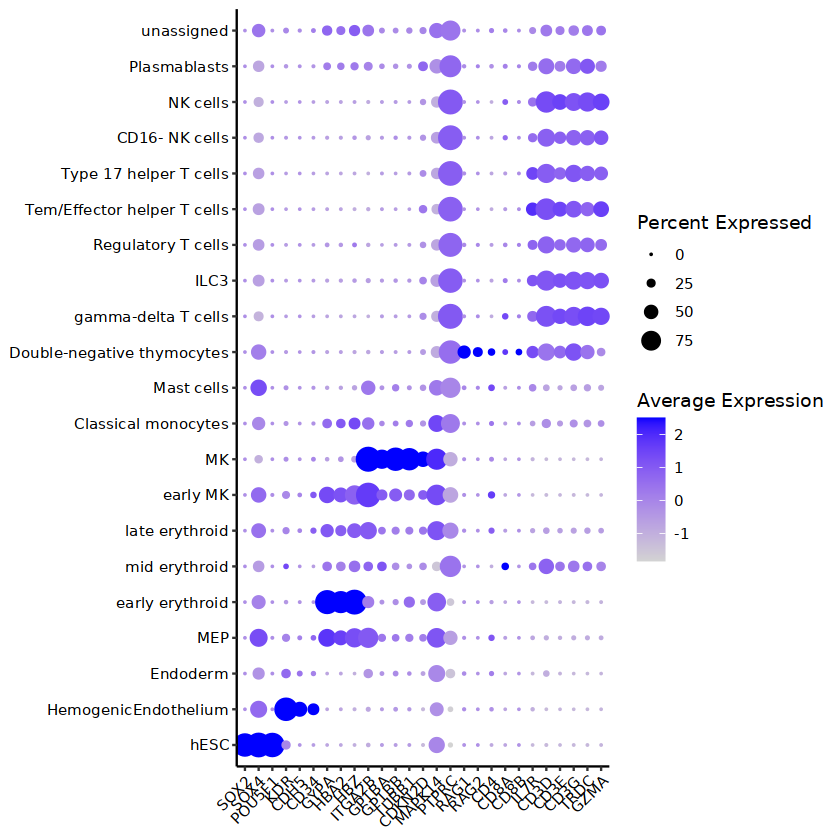

In [199]:
dotplot3<-DotPlot(
  adata,
  features=markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))
dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation_FINAL.png', width =1000)
dotplot3
dev.off()

## WNN by Construction_annotation

In [203]:
levels(adata@meta.data$Construction_annotation)

length(levels(adata@meta.data$Construction_annotation))

[1] "hESC"                        "HemogenicEndothelium"       
 [3] "Endoderm"                    "MEP"                        
 [5] "early erythroid"             "mid erythroid"              
 [7] "late erythroid"              "early MK"                   
 [9] "MK"                          "Classical monocytes"        
[11] "Mast cells"                  "Double-negative thymocytes" 
[13] "gamma-delta T cells"         "ILC3"                       
[15] "Regulatory T cells"          "Tem/Effector helper T cells"
[17] "Type 17 helper T cells"      "CD16- NK cells"             
[19] "NK cells"                    "Plasmablasts"               
[21] "unassigned"

[1] 21

In [211]:
vector_colors<-c('#E41A1C','#377EB8','#8DD3C7','#4DAF4A','#984EA3','#FF7F00','#FFFF33','#F781BF','yellowgreen','#C7E9C0','#08519C','#FB6A4A','#EF3B2C','#CB181D','#A50F15','#67000D','#FFF5F0',
                '#FDAE6B','#D94801','#FCBBA1','gray')

str(vector_colors)
cat("\n")

names(vector_colors)<-levels(adata@meta.data$Construction_annotation)

str(vector_colors)
cat("\n")

 chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" "#FF7F00" ...

 Named chr [1:21] "#E41A1C" "#377EB8" "#8DD3C7" "#4DAF4A" "#984EA3" ...
 - attr(*, "names")= chr [1:21] "hESC" "HemogenicEndothelium" "Endoderm" "MEP" ...



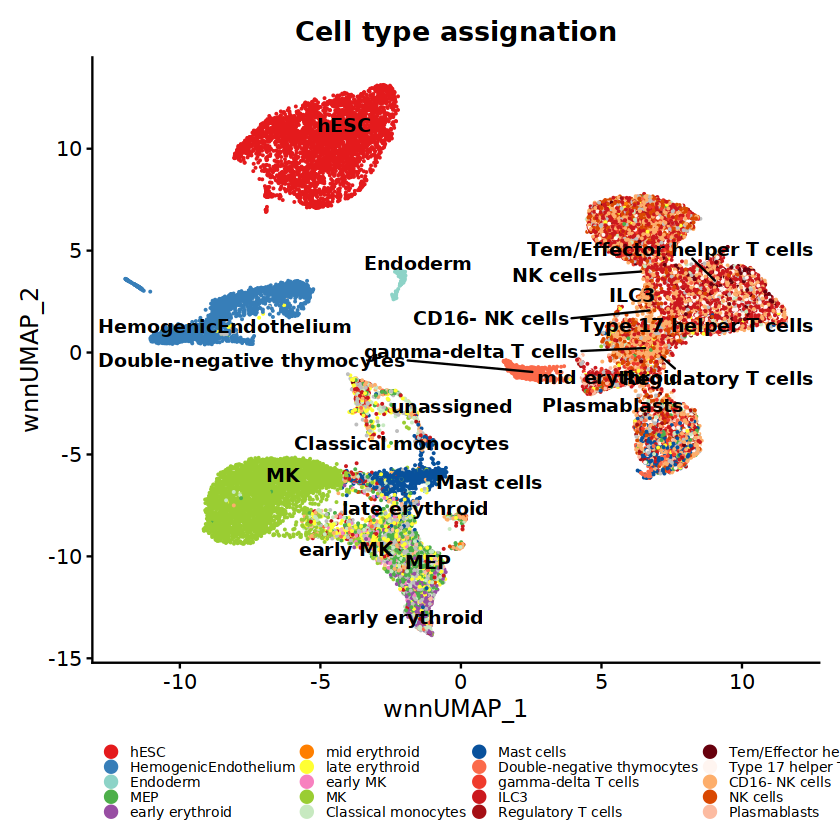

In [212]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "Construction_annotation", label = FALSE, cols=vector_colors) 

p3<-LabelClusters(p3, id = "Construction_annotation",  fontface = "bold", color = "black")+
ggtitle("Cell type assignation")+
theme(legend.title = element_blank(),
                  legend.text = element_text(size=8, color="black", family="sans"),
                  legend.key.size = unit(0.25, 'cm'), #change legend key size
                  legend.key.height = unit(0.25, 'cm'), #change legend key height
                  legend.key.width = unit(0.25, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=8,byrow=TRUE))

p3


In [214]:
## Graph WNN by CellTypist_label_filtered

setwd(path_graphs)
png(file='WNN_by_Construction_annotation_FINAL.png', width=750, height=750)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

png 
  2

# New markers

In [215]:
str(genes)

Formal class 'standardGeneric' [package "methods"] with 8 slots
  ..@ .Data     :function (x, ...)  
  ..@ generic   : chr "genes"
  .. ..- attr(*, "package")= chr "GenomicFeatures"
  ..@ package   : chr "GenomicFeatures"
  ..@ group     : list()
  ..@ valueClass: chr(0) 
  ..@ signature : chr "x"
  ..@ default   : NULL
  ..@ skeleton  : language (function (x, ...)  stop(gettextf("invalid call in method dispatch to '%s' (no default method)",  ...


In [216]:
genes[grep("CD14", genes)]

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'i' in selecting a method for function '[': cannot coerce type 'closure' to vector of type 'character'


In [217]:
new_markers<-c('PTPRC','CD14','S100A9','S100A12','TPSB2','TPSAB1','RAG1','RAG2','CD4','CD8A','CD8B','IL7R','CD3D','CD3E','CD3G','TRDC','GZMA','GZMB','GZMK','PRF1','GNLY','NCAM1','IFNG','TYROBP','NKG7','RORC','PCDH9','KIT','LST1','CD160','FCGR3A','FCER1A','FOXP3','IL2RA','IL17B','TBX21','CD79A','JCHAIN')

png 
  2

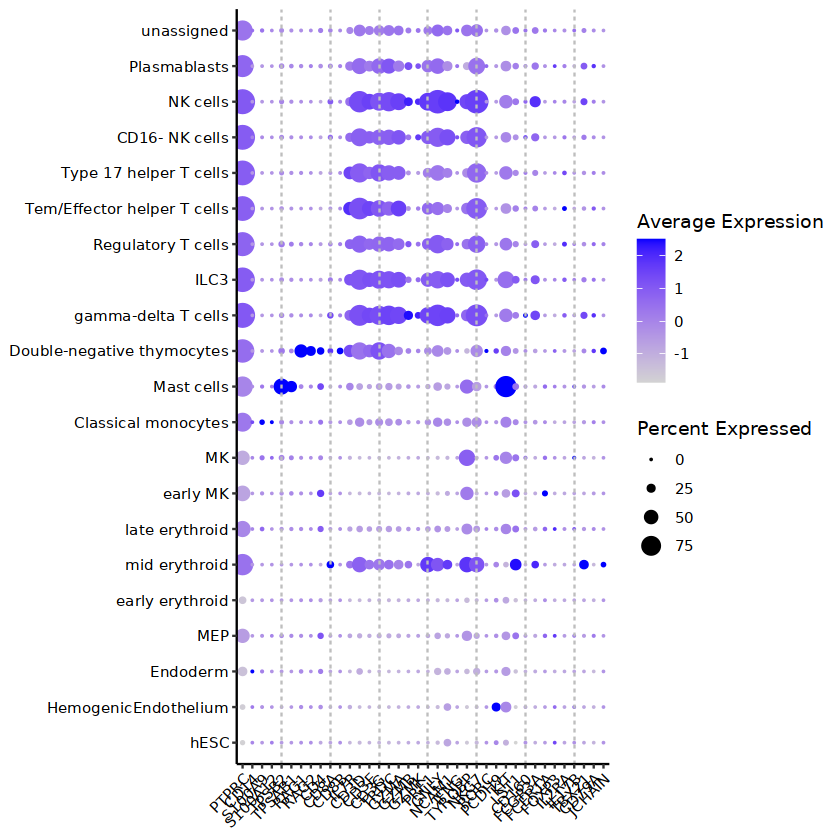

In [218]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="Construction_annotation")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_Construction_annotation_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

png 
  2

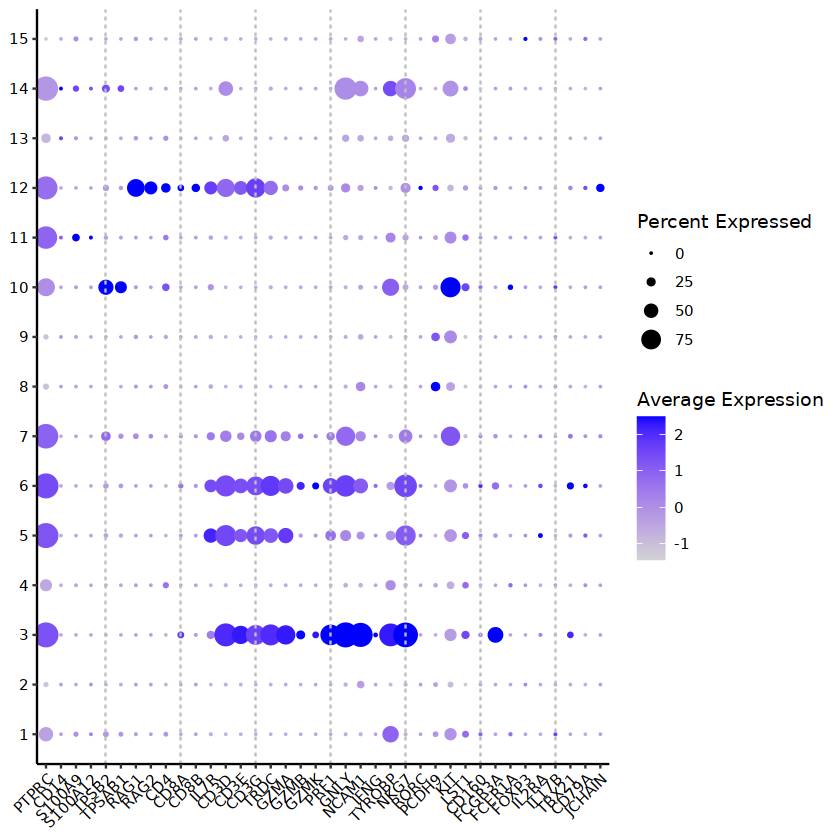

In [219]:
dotplot3<-DotPlot(
  adata,
  features=new_markers,
  assay = "SCT",
    group.by="seurat_clusters")+
 theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_blank(),
          axis.title.x=element_blank(),
          axis.text.y=element_text(color="black", family="sans"),
          axis.text.x=element_text(angle=45,vjust=1,hjust=1, color="black", family="sans"))+
geom_vline(xintercept=c(5,10,15,20,25,30,35), linetype="dashed", color="gray")

dotplot3

setwd(path_graphs)
png(file='Dotplot_marker_genes_by_seurat_clusters_NEW_MARKERS.png', width =1000)
dotplot3
dev.off()

# SAVE

In [220]:
setwd("/scratch/manuel.tardaguila/2025_hESC_competition_assays_reanalysed/processing_outputs/")

In [221]:
saveRDS(adata, file="merged_unprocessed_db_filt_clustered_QCed_cell_annotated.rds")